This project is about using LIME to explain individual predictions in a Machine Learning application. Your instructor is Dr. E. Kapetanios (PhD, ETH Zurich).

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import plotly.express as px

In [2]:
df=pd.read_csv("winequality-red.csv")

In [4]:
#See number of rows and columns
print("Rows,Columns:"+str(df.shape))

Rows,Columns:(1599, 12)


In [5]:
#Exahmine head of dataset
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
#Getting summary statistics
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
#Missing values
print(df.isna().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [10]:
#Assigning all float values as predictors
X_feature_names=[i for i in df.columns if df[i].dtype in [np.float] ]
print(X_feature_names)

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


In [14]:
Y_feature_names=[i for i in df.columns if df[i].dtype in [np.int64]]
Y_feature_names

AttributeError: 'list' object has no attribute 'dtype'

In [15]:
#Create classification model
df['goodquality']=[1 if x>=7 else 0 for x in df['quality']]

In [16]:
#Seperate feature variables and target variable
X=df.drop(['quality','goodquality'],axis=1)
y=df['goodquality']

In [18]:
#See proportion of good vs bad wines
df['goodquality'].value_counts()

0    1382
1     217
Name: goodquality, dtype: int64

In [22]:
#Normalise feature variables
from sklearn.preprocessing import StandardScaler
X_features = X
X = StandardScaler().fit_transform(X)

In [26]:
#Splitting data in train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [27]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

In [28]:
model1=DecisionTreeClassifier(random_state=1)
model1.fit(X_train,y_train)
y_pred1=model1.predict(X_test)

In [29]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       355
           1       0.53      0.73      0.62        45

    accuracy                           0.90       400
   macro avg       0.75      0.83      0.78       400
weighted avg       0.92      0.90      0.90       400



In [30]:
from sklearn.ensemble import RandomForestClassifier
model2=RandomForestClassifier(random_state=1)
model2.fit(X_train,y_train)
y_pred2=model2.predict(X_test)

In [31]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       355
           1       0.68      0.58      0.63        45

    accuracy                           0.92       400
   macro avg       0.82      0.77      0.79       400
weighted avg       0.92      0.92      0.92       400



In [32]:
from sklearn.ensemble import AdaBoostClassifier
model3=AdaBoostClassifier(random_state=1)
model3.fit(X_train,y_train)
y_pred3=model3.predict(X_test)

In [33]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       355
           1       0.51      0.49      0.50        45

    accuracy                           0.89       400
   macro avg       0.72      0.71      0.72       400
weighted avg       0.89      0.89      0.89       400



In [35]:
#####Prepare and train LIME Classifier
import lime
import lime.lime_tabular

In [36]:
explainer=lime.lime_tabular.LimeTabularExplainer(np.array(X_train),feature_names=X_feature_names,class_names=['goodquality'],verbose=True,mode='regression')

In [37]:
print(y_test)

1109    0
1032    0
1002    1
487     0
979     0
       ..
489     0
362     0
526     0
442     1
1229    0
Name: goodquality, Length: 400, dtype: int64


In [40]:
exp=explainer.explain_instance(X_test[21],model2.predict)

Intercept 0.027910382946481693
Prediction_local [-0.01500507]
Right: 0


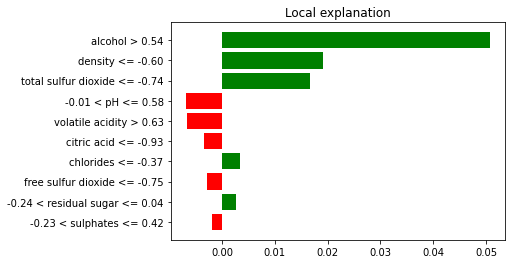

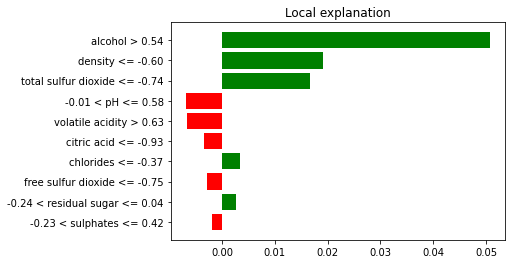

In [39]:
exp.as_pyplot_figure()

In [41]:
print(y_test[0:3])

1109    0
1032    0
1002    1
Name: goodquality, dtype: int64


In [43]:
print(model3.predict(X_test[0:3]))

[0 0 1]
